In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df=pd.read_csv('C:\\Users\\KIIT\\Downloads\\archive(4)\\Salary_dataset.csv')

In [5]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
df_copy=df.copy()

In [7]:
df_copy.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [11]:
df_copy.drop(df_copy.columns[0],axis=1,inplace=True)

In [12]:
df_copy.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [14]:
df_copy.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

## conclusion1-There is no any null value

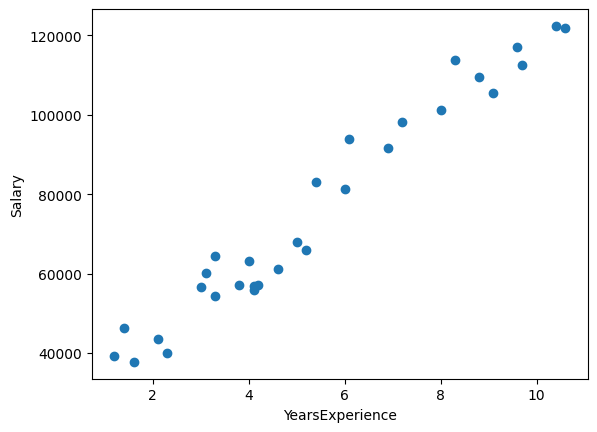

In [91]:
#scatter plot
plt.scatter(df_copy['YearsExperience'],df_copy['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [92]:
df_copy.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## conclusion2-The values are highly and positively correlated 

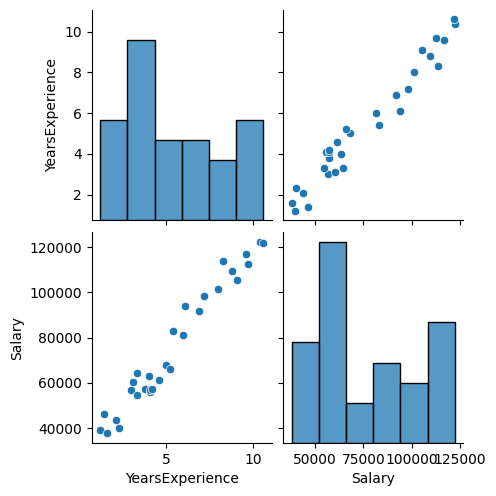

In [93]:
sns.pairplot(df_copy)

## Independent and Dependent Features

In [94]:
X=df_copy[['YearsExperience']

In [95]:
type(X)

pandas.core.frame.DataFrame

In [96]:
X

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [97]:
X.shape

(30, 1)

In [98]:
X.head()

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3


In [99]:
y=df_copy['Salary']

In [100]:
y

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64

In [101]:
type(y)

pandas.core.series.Series

In [102]:
y.shape

(30,)

## Train Test Split of Data

In [103]:
from sklearn.model_selection import train_test_split

In [121]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [122]:
X_train

,YearsExperience
28,10.4
24,8.8
12,4.1
0,1.2
4,2.3
16,5.2
5,3.0
13,4.2
11,4.1
22,8.0


X_test

In [123]:
X_train.shape

(24, 1)

In [124]:
X_test.shape

(6, 1)

## Standarization

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
scaler=StandardScaler()
X_train-scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Applying Linear Regression

In [127]:
from sklearn.linear_model import LinearRegression

In [142]:
regression=LinearRegression()

In [143]:
regression.fit(X_train,y_train)

LinearRegression()

In [144]:
regression.coef_

array([9423.81532303])

In [145]:
print("The coefficient is ",regression.coef_)
print("The intercept is",regression.intercept_)

The coefficient is  [9423.81532303]
The intercept is 24380.20147947369


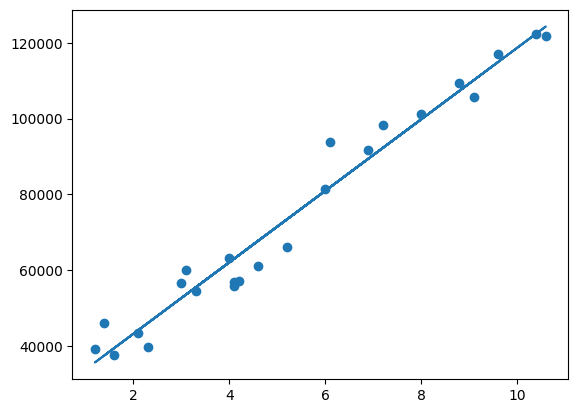

In [132]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [133]:
y_pred=regression.predict(X_test)

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [134]:
regressio

array([38812.77657134, 23439.835397  , 34233.60260452, 24748.17081609,
       17879.40986586, 19514.82913972])

## Performance Metrics

In [140]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [141]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

3459073770.5882263
56747.39593424519
58813.890966235405


In [138]:
regression.predict(scaler.transform([[10.6]]))

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41756.5312643])

## OlS Regression

In [82]:
!pip install statsmodels


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
import statsmodels.api as sm

In [85]:
model=sm.OLS(y_train,X_train).fit()

In [86]:
prediction=model.predict(X_test)

In [87]:
print(prediction)

[23769.73731491   517.22228784 16843.45624301  2496.15973695
 -7893.26187089 -5419.5900595  27232.87785085 19317.1280544 ]


In [90]:
regression.predict(scaler.transform([[10.6]]))

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([44529.53717417])

In [153]:
df.drop('Unnamed: 0',axis=1, inplace=True)
X = df[['YearsExperience']]  # Independent feature
y = df['Salary']   #Dependent Feature

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [156]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [157]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [160]:
regression.fit(X_train, y_train)

LinearRegression()

In [161]:
y_pred = regression.predict(X_test)

In [162]:
regression.predict(scaler.transform([[10.8]]))

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([126157.40696821])

In [163]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [164]:
df_copy.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
